In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
from analysis import model_generated, selection, add_variables, final_selection, phsp_generator
from k3pi_utilities import helpers
from matplotlib.backends.backend_pdf import PdfPages
from analysis.mass_fitting import get_yields, fit_parameters
from k3pi_config.modes import MODE, gcm
from k3pi_config import config
config.candidates_selection = True
config.optimised_selection = True
config.misid_selection = True

from analysis import efficiencies
import numpy as np
import matplotlib.pyplot as plt
from k3pi_plotting import comparison


from k3pi_config.modes.D0ToKpipipi_RS import D0ToKpipipi_RS as mode_config
from k3pi_utilities import variables as vars
from k3pi_utilities import logger

/afs/cern.ch/user/d/dmuller/work/anaconda3/envs/k3pi_python3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/afs/cern.ch/user/d/dmuller/work/anaconda3/envs/k3pi_python3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
RS = model_generated.get_model()
WS = model_generated.get_model_ws()

In [13]:
with MODE('MagBoth', 1516, 'WS'):

    outfile = gcm().get_output_path('effs') + 'WS_RS_comparison.pdf'
    with PdfPages(outfile) as pdf:
        for pc in gcm().phsp_vars + extra_vars:
            filled = WS[pc.var]
            errorbars = RS[pc.var]
            pc.binning = (100, *pc.binning[1:])
            if pc.convert is not None:
                filled = pc.convert(filled)
                errorbars = pc.convert(errorbars)
            ax = comparison.plot_comparison(
                    pc, filled, errorbars, 'WS', 'RS')
            ax.set_xlabel(pc.xlabel)
            ax.yaxis.set_visible(False)
            ax.legend()
            pdf.savefig(plt.gcf())
            plt.close()

In [3]:
with MODE('MagBoth', 1516, 'WS'):

    extra_vars = [
        gcm().ltime_var
    ]

    # Current mode stuff
    data = gcm().get_data([f.var for f in extra_vars])
    add_variables.append_phsp(data)
    df_sel = final_selection.get_final_selection()
    df_sel &= selection.delta_mass_signal_region()
    df_sb = final_selection.get_final_selection()
    df_sb &= selection.mass_sideband_region()
    df_sb_n = final_selection.get_final_selection()
    df_sb_n &= selection.delta_mass_sideband_near()
    df_sb_f = final_selection.get_final_selection()
    df_sb_f &= selection.delta_mass_sideband_far()
    config.candidates_selection = False
    df_sel2 = final_selection.get_final_selection()
    df_sel2 &= selection.delta_mass_signal_region()
    
with MODE('MagBoth', 1516, 'RS'):

    extra_vars = [
        gcm().ltime_var
    ]

    # Current mode stuff
    data_rs = gcm().get_data([f.var for f in extra_vars])
    add_variables.append_phsp(data_rs)
    rs_sel = final_selection.get_final_selection()
    rs_sel &= selection.delta_mass_signal_region()

INFO:buffer_load:Loading Cached/phsp_variablesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/spearmint_spi_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_right_sign_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/randomly_remove_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_clonesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/delta_mass_signal_regionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_WSMagBoth1516 from

In [5]:
with MODE('MagBoth', 1516, 'WS'):
    outfile = gcm().get_output_path('background') + 'near_far.pdf'
    with PdfPages(outfile) as pdf:
        for pc in gcm().phsp_vars + extra_vars:
            filled = data[pc.var][df_sb_n]
            errorbars = data[pc.var][df_sb_f]
            if pc.convert is not None:
                filled = pc.convert(filled)
                errorbars = pc.convert(errorbars)
            ax = comparison.plot_comparison(
                    pc, filled, errorbars, 'Near', 'Far', normed=True)
            ax.set_xlabel(pc.xlabel)
            ax.yaxis.set_visible(False)
            ax.legend()
            pdf.savefig(plt.gcf())
            plt.close()

INFO:helpers:Creating directory structure output/D0ToKpipipi_WS_1516_MagBoth/background/


In [3]:
with MODE('MagBoth', 1516, 'WS'):
    a = get_yields()

INFO:metrics:Signal yield: 2788.6900062735735
INFO:metrics:Signal integral: 0.85066458033669
INFO:metrics:Random pion yield: 57576.28894096113
INFO:metrics:Random pion integral: 0.050888265696840865


In [4]:
np.sqrt(2788.6900062735735*30)*0.85066458033669

246.04757989433696

In [5]:
np.sqrt(57576.28894096113*30)*0.050888265696840865

66.880592522281049

In [6]:
a[0]*30, a[1]*30

(71167.19441627493, 87898.7246839713)

In [11]:
0.0489050857973518*71732.82834934306*30, 0.0489050857973518*np.sqrt(71732.82834934306*30)

(105243.00374733996, 71.742024837849939)

In [37]:
with MODE('MagBoth', 1516, 'WS'):
    
    bla = mass_fitting.get_sweights()

INFO:buffer_load:Loading Cached/get_sweightsD0ToKpipipi_WSMagBoth1516 from output/data/store.h5


In [40]:
with MODE('MagBoth', 1516, 'WS'):
    
    extra_vars = [
        gcm().ltime_var,
    ]
    data = gcm().get_data([f.var for f in extra_vars])
    add_variables.append_phsp(data)
    config.misid_selection = True
    df_sel = final_selection.get_final_selection()
    bla = mass_fitting.get_sweights()
    
    outfile = gcm().get_output_path('background') + 'fuck_knows.pdf'
    with PdfPages(outfile) as pdf:
        for pc in gcm().phsp_vars + extra_vars:
            filled = WS[pc.var]
            errorbars = data[pc.var][df_sel]
            if pc.convert is not None:
                filled = pc.convert(filled)
                errorbars = pc.convert(errorbars)
            ax = comparison.plot_comparison(
                    pc, filled, errorbars, 'Near', 'Far', normed=True, filled_weight=eff_WS, errorbars_weight=bla.sig)
            ax.set_xlabel(pc.xlabel)
            ax.yaxis.set_visible(False)
            ax.legend()
            pdf.savefig(plt.gcf())
            plt.close()

INFO:buffer_load:Loading Cached/phsp_variablesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/spearmint_spi_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_right_sign_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/randomly_remove_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_clonesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/misid_cutD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/get_sweightsD0ToKpipipi_WSMagBoth1516 from output/data/store.h5


In [4]:
with MODE('MagBoth', 1516, 'WS'):
    eff_RS = efficiencies.compute_efficiency(RS)
    eff_WS = efficiencies.compute_efficiency(WS)

INFO:efficiencies:Getting efficiencies for m12, m34, cos1, cos2, D0_Loki_BPVLTIME, cosphi, sinphi
INFO:efficiencies:Getting efficiencies for m12, m34, cos1, cos2, D0_Loki_BPVLTIME, cosphi, sinphi


In [5]:
eff_RS[eff_RS>0.5]=0.5
eff_RS = eff_RS/0.5
eff_WS[eff_WS>0.5]=0.5
eff_WS = eff_WS/0.5

In [4]:
WS['eff'] = eff_WS
RS['eff'] = eff_RS
WS[vars.m12()] = WS[vars.m12()] / 1000.
WS[vars.m34()] = WS[vars.m34()] / 1000.
WS[vars.ltime(mode_config.D0)] = WS[vars.ltime(mode_config.D0)] * 1000.
WS.rename(
            columns={vars.cos1():'c12',
                     vars.cos2():'c34',
                     vars.ltime(mode_config.D0):'dtime',
                     vars.phi1():'phi',
                     vars.m12():'m12',
                     vars.m34():'m34'},
            inplace=True)
RS[vars.m12()] = RS[vars.m12()] / 1000.
RS[vars.m34()] = RS[vars.m34()] / 1000.
RS[vars.ltime(mode_config.D0)] = RS[vars.ltime(mode_config.D0)] * 1000.
RS.rename(
            columns={vars.cos1():'c12',
                     vars.cos2():'c34',
                     vars.ltime(mode_config.D0):'dtime',
                     vars.phi1():'phi',
                     vars.m12():'m12',
                     vars.m34():'m34'},
            inplace=True)

In [5]:
import root_pandas
WS.to_root('root://eoslhcb.cern.ch//eos/lhcb/user/d/dmuller/K3Pi/signal_toy_data_v2.root')
RS.to_root('root://eoslhcb.cern.ch//eos/lhcb/user/d/dmuller/K3Pi/background_toy_data_v2.root')

In [2]:
PHSP = phsp_generator.phsp_goofit()
PHSP['D0_Loki_BPVLTIME'] = PHSP['D0_Loki_BPVLTIME']/1000.
with MODE('MagBoth', 1516, 'WS'):
    eff_PHSP = efficiencies.compute_efficiency(PHSP)
PHSP['eff'] = eff_PHSP
PHSP = PHSP[PHSP.D0_Loki_BPVLTIME < 0.00326]
PHSP[vars.m12()] = PHSP[vars.m12()] / 1000.
PHSP[vars.m34()] = PHSP[vars.m34()] / 1000.
PHSP[vars.ltime(mode_config.D0)] = PHSP[vars.ltime(mode_config.D0)] * 1000.
PHSP.rename(
            columns={vars.cos1():'c12',
                     vars.cos2():'c34',
                     vars.ltime(mode_config.D0):'dtime',
                     vars.phi1():'phi',
                     vars.m12():'m12',
                     vars.m34():'m34'},
            inplace=True)
import root_pandas
PHSP.to_root('root://eoslhcb.cern.ch//eos/lhcb/user/d/dmuller/K3Pi/phsp_mc_eff_exp2.root')

INFO:efficiencies:Getting efficiencies for m12, m34, cos1, cos2, D0_Loki_BPVLTIME, cosphi, sinphi


In [5]:
rs_hm = eff_RS > np.random.uniform(0, 1., size=eff_RS.index.size)
ws_hm = eff_WS > np.random.uniform(0, 1., size=eff_WS.index.size)

In [6]:
WS['eff'] = eff_WS
RS['eff'] = eff_RS

In [4]:
PHSP['eff'] = eff_PHSP

In [13]:
np.random.poisson(a[0]*30)

103818

In [14]:
np.random.poisson(a[1]*30)

110453

In [7]:
sample = WS[ws_hm].sample(np.random.poisson(a[0]*30))
sample = sample.append(RS[rs_hm].sample(np.random.poisson(a[1]*30)), ignore_index=True)

In [8]:
config.misid_selection=True
with MODE('MagBoth', 1516, 'WS'):

    extra_vars = [
        gcm().ltime_var,
    ]

    # Current mode stuff
    data = gcm().get_data([f.var for f in extra_vars])
    add_variables.append_phsp(data)
    df_sel = final_selection.get_final_selection()
    # df_sel &= selection.delta_mass_wide_signal_region()

    outfile = gcm().get_output_path('effs') + 'toy_data_alt.pdf'
    with PdfPages(outfile) as pdf:
        for pc in gcm().phsp_vars + extra_vars:
            filled = sample[pc.var]
            pc.binning = (30, *pc.binning[1:])
            errorbars = data[pc.var][df_sel]
            if pc.convert is not None:
                filled = pc.convert(filled)
                errorbars = pc.convert(errorbars)
            ax = comparison.plot_comparison(
                    pc, filled, errorbars, 'Toy', 'Data')
            ax.set_xlabel(pc.xlabel)
            ax.yaxis.set_visible(False)
            ax.legend()
            pdf.savefig(plt.gcf())
            plt.close()


INFO:buffer_load:Loading Cached/phsp_variablesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/spearmint_spi_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_right_sign_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/randomly_remove_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_clonesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/misid_cutD0ToKpipipi_WSMagBoth1516 from output/data/store.h5


In [2]:
config.misid_selection = True
with MODE('MagBoth', 1516, 'WS'):

    extra_vars = [
        gcm().ltime_var,
        gcm().dmass_var
    ]

    # Current mode stuff
    dataWS = gcm().get_data([f.var for f in extra_vars])
    add_variables.append_phsp(dataWS)
    ws_sel = final_selection.get_final_selection()
    ws_sel &= selection.delta_mass_signal_region()
    with MODE('MagBoth', 1516, 'RS'):
        # Current mode stuff
        dataRS = gcm().get_data([f.var for f in extra_vars])
        add_variables.append_phsp(dataRS)
        rs_sel = final_selection.get_final_selection()
        rs_sel &= selection.delta_mass_signal_region()

    outfile = gcm().get_output_path('effs') + 'WS_Sig_vs_RS_Sig_no_dtf.pdf'
    with PdfPages(outfile) as pdf:
        for pc in gcm().phsp_vars + extra_vars:
            pc.binning = (20, *pc.binning[1:])
            filled = dataRS[pc.var][rs_sel]
            errorbars = dataWS[pc.var][ws_sel]
            if pc.convert is not None:
                filled = pc.convert(filled)
                errorbars = pc.convert(errorbars)
            ax = comparison.plot_comparison(
                    pc, filled, errorbars, 'RS sig window', 'WS sig window')
            ax.set_xlabel(pc.xlabel)
            ax.yaxis.set_visible(False)
            ax.legend()
            pdf.savefig(plt.gcf())
            plt.close()

INFO:buffer_load:Loading Cached/phsp_variablesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Caching into Cached/phsp_variablesD0ToKpipipi_WSMagBoth1516
INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/spearmint_spi_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_right_sign_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/randomly_remove_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_clonesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/misid_cutD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/delta_mass_signal_regionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INF

In [18]:
sample.to_root('root://eoslhcb.cern.ch//eos/lhcb/user/d/dmuller/K3Pi/phsp_mc_eff.root')

NameError: name 'sample' is not defined

In [16]:
PHSP = PHSP[PHSP.D0_Loki_BPVLTIME < 0.00326]

In [5]:
PHSP['eff'] = eff_PHSP
PHSP = PHSP[PHSP.D0_Loki_BPVLTIME < 0.00326]
PHSP[vars.m12()] = PHSP[vars.m12()] / 1000.
PHSP[vars.m34()] = PHSP[vars.m34()] / 1000.
PHSP[vars.ltime(mode_config.D0)] = PHSP[vars.ltime(mode_config.D0)] * 1000.
PHSP.rename(
            columns={vars.cos1():'c12',
                     vars.cos2():'c34',
                     vars.ltime(mode_config.D0):'dtime',
                     vars.phi1():'phi',
                     vars.m12():'m12',
                     vars.m34():'m34'},
            inplace=True)
PHSP.to_root('root://eoslhcb.cern.ch//eos/lhcb/user/d/dmuller/K3Pi/phsp_mc_eff_flat.root')

In [5]:
imp_samp_time=1.

def two_parts(xs, turn=0.6):
    ys = np.ones(len(xs))
    ys[xs<turn] = xs[xs<turn]*np.exp(-turn/imp_samp_time)/turn
    ys[xs>=turn] = np.exp(-xs[xs>=turn]/imp_samp_time)
    norm = 0.5*np.exp(-turn/imp_samp_time)/turn*turn**2 - 0.5*np.exp(-turn/imp_samp_time)/turn*0.1725**2
    norm += (-imp_samp_time*np.exp(-3.26/imp_samp_time)+imp_samp_time*np.exp(-turn/imp_samp_time))
    return ys/norm

def two_parts_generate(turn=0.6, size=1):
    int_left = 0.5*np.exp(-turn/imp_samp_time)/turn*turn**2 - 0.5*np.exp(-turn/imp_samp_time)/turn*0.1725**2
    int_right = (-imp_samp_time*np.exp(-3.26/imp_samp_time)+imp_samp_time*np.exp(-turn/imp_samp_time))
    print(int_left, int_right)
    fl = int_left/(int_left+int_right)
    print(fl)
    left = np.random.triangular(0, turn, turn, size=int(fl*size*3.0))
    left = left[left>0.1725][:int(fl*size)]
    right = np.random.exponential(imp_samp_time, size=int((size-int(fl*size))*1.4)) + turn
    return np.append(left, right[right<3.26][:size-int(fl*size)])

In [3]:
PHSP = phsp_generator.phsp_goofit()

In [5]:
PHSP['weight'] = two_parts(PHSP['D0_Loki_BPVLTIME']*1000., 0.55)

In [6]:
with MODE('MagBoth', 1516, 'WS'):
    eff_PHSP = efficiencies.compute_efficiency(PHSP)
PHSP['eff'] = eff_PHSP

INFO:efficiencies:Getting efficiencies for m12, m34, cos1, cos2, D0_Loki_BPVLTIME, cosphi, sinphi


In [7]:
# PHSP['eff'] = PHSP['eff']/PHSP['weight']
PHSP[vars.m12()] = PHSP[vars.m12()] / 1000.
PHSP[vars.m34()] = PHSP[vars.m34()] / 1000.
PHSP[vars.ltime(mode_config.D0)] = PHSP[vars.ltime(mode_config.D0)] * 1000.
PHSP.rename(
            columns={vars.cos1():'c12',
                     vars.cos2():'c34',
                     vars.ltime(mode_config.D0):'dtime',
                     vars.phi1():'phi',
                     vars.m12():'m12',
                     vars.m34():'m34'},
            inplace=True)
import root_pandas
PHSP.to_root('root://eoslhcb.cern.ch//eos/lhcb/user/d/dmuller/K3Pi/phsp_mc_eff_exp3.root')

In [18]:
PHSP.query('eff<0.6').to_root('root://eoslhcb.cern.ch//eos/lhcb/user/d/dmuller/K3Pi/rs_integration_sample.root')

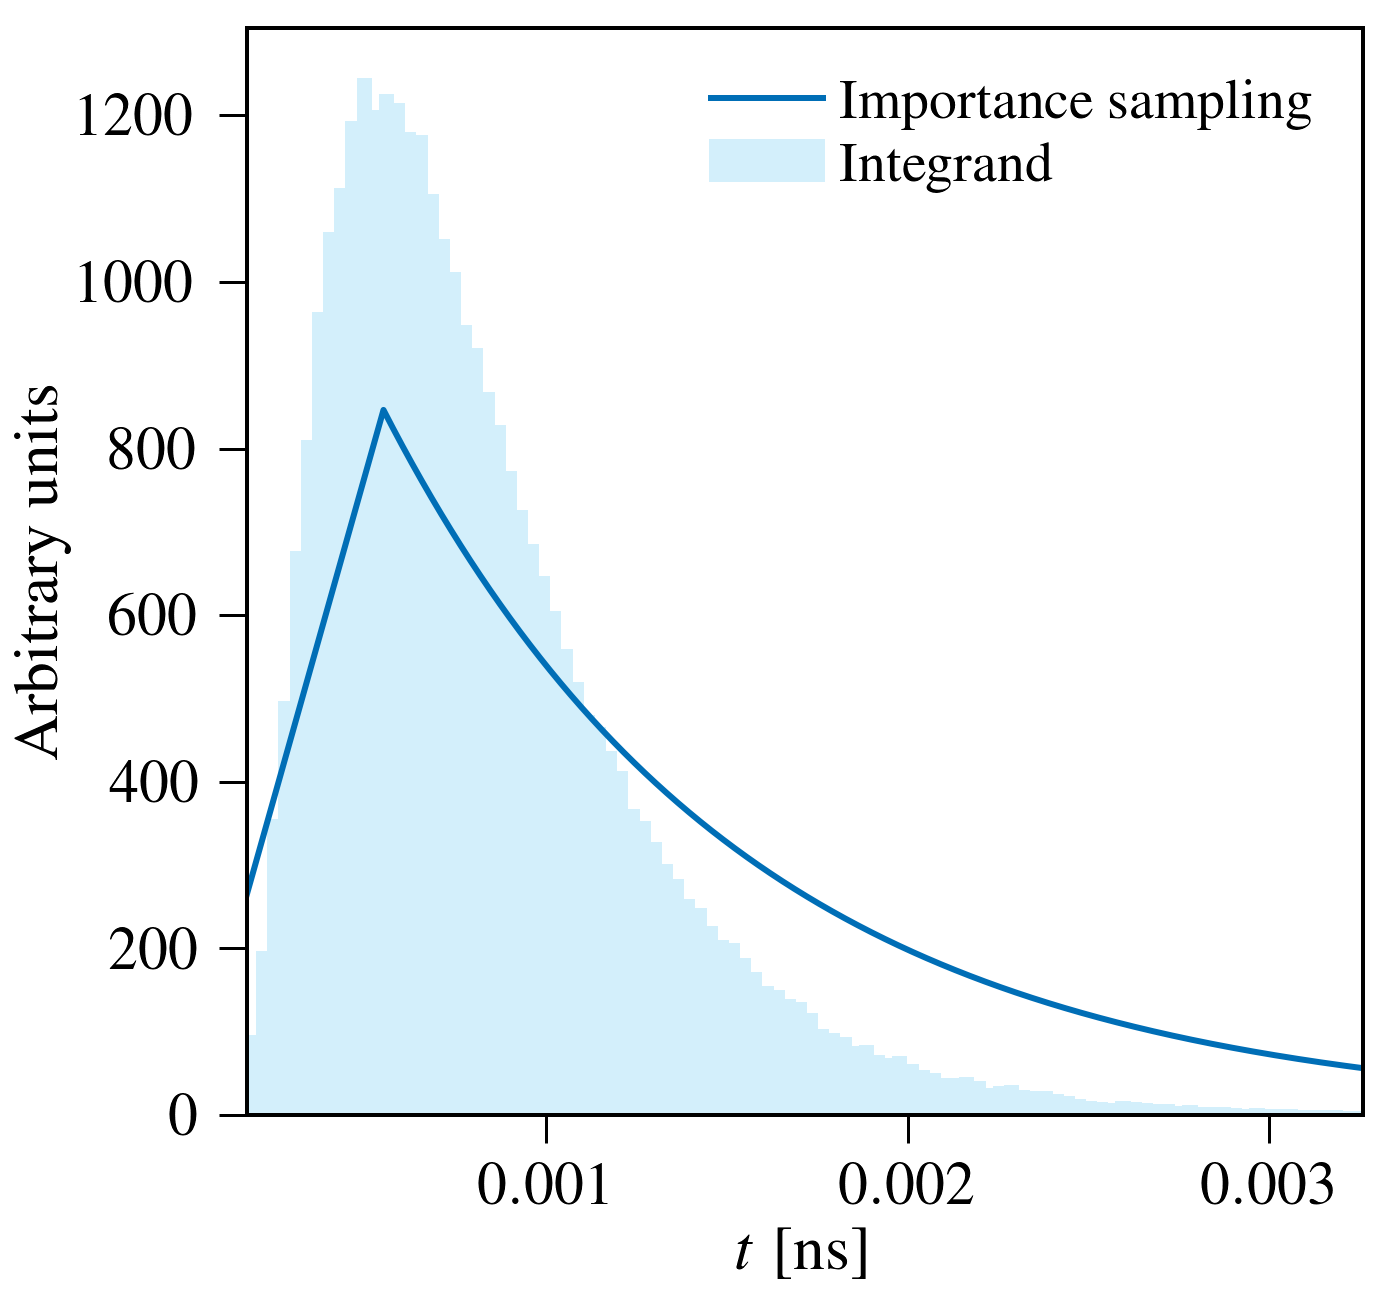

In [8]:
with MODE('MagBoth', 1516, 'WS'):
    mode = gcm()
    outfile = gcm().get_output_path('amplitude_fit') + 'importance_sampling.pdf'
    fig, ax = plt.subplots(figsize=(10, 10))
    xs = np.linspace(0.1725, 3.26, 10000)
    ys = two_parts(xs, turn=.55)
    ax.hist(WS.D0_Loki_BPVLTIME, bins=100, range=(0.1725/1000., 3.26/1000.), normed=True, weights=eff_WS, linewidth=2,color='#D3EFFB', edgecolor='#D3EFFB', label='Integrand');
    ax.plot(xs/1000.,ys*1000, linewidth=3, color='#006EB6', label='Importance sampling')
    ax.set_xlim((0.1725/1000., 3.26/1000.))
    ax.set_ylabel('Arbitrary units')
    ax.set_xlabel(gcm().ltime_var.xlabel)
    ax.legend()
    fig.savefig(outfile)

In [20]:
bla2 = bla[(bla>0.1725) &( bla < 3.26)]

In [41]:
np.random.power?

(array([  1052.,   3040.,   4983.,   7142.,   9152.,  11009.,  13022.,
         14701.,  16967.,  18932.]),
 array([ 0.00404212,  0.10363739,  0.20323265,  0.30282792,  0.40242319,
         0.50201845,  0.60161372,  0.70120899,  0.80080425,  0.90039952,
         0.99999479]),
 <a list of 10 Patch objects>)

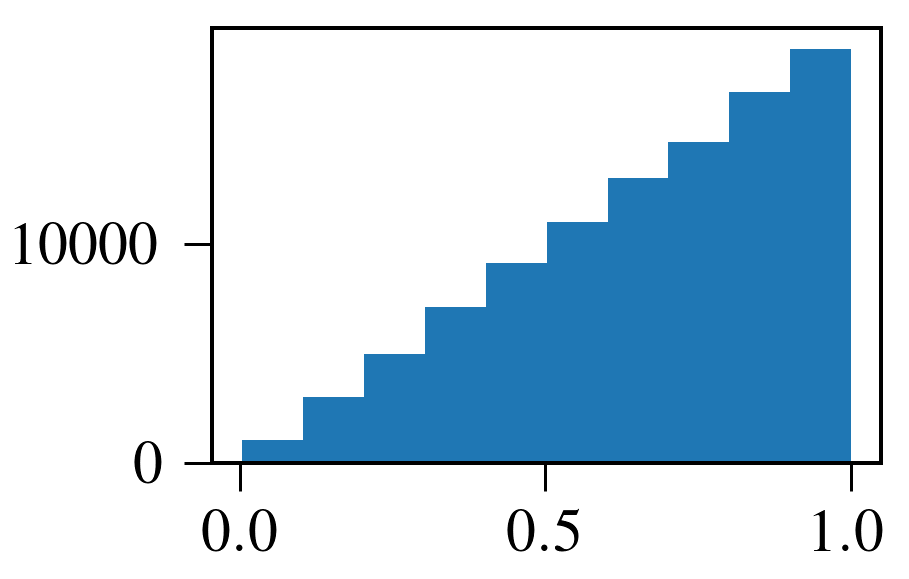

In [42]:
plt.hist(np.random.triangular(0,1,1, size=100000))